## Problem Statement

Based on the given airline passenger journey deatails we need to predict the passesnger is satisfied or dissatisfied with airline services.
Find what are the factors are highly correlated to the target variable.

In [3]:
## import the necessary libraries to read the data

import pandas as pd
import numpy as np

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [125]:
df_train.head().T


0  \
Unnamed: 0                                               0   
id                                                   70172   
Gender                                                Male   
Customer Type                               Loyal Customer   
Age                                                     13   
Type of Travel                             Personal Travel   
Class                                             Eco Plus   
Flight Distance                                        460   
Inflight wifi service                                    3   
Departure/Arrival time convenient                        4   
Ease of Online booking                                   3   
Gate location                                            1   
Food and drink                                           5   
Online boarding                                          3   
Seat comfort                                             5   
Inflight entertainment                                   5   
On-board service                                         4   
Leg room service                                         3   
Baggage handling                                         4   
Checkin service                                          4   
Inflight service                                         5   
Cleanliness                                              5   
Departure Delay in Minutes                              25   
Arrival Delay in Minutes                              18.0   
satisfaction                       neutral or dissatisfied   

                                                         1                2  \
Unnamed: 0                                               1                2   
id                                                    5047           110028   
Gender                                                Male           Female   
Customer Type                            disloyal Customer   Loyal Customer   
Age                                                     25               26   
Type of Travel                             Business travel  Business travel   
Class                                             Business         Business   
Flight Distance                                        235             1142   
Inflight wifi service                                    3                2   
Departure/Arrival time convenient                        2                2   
Ease of Online booking                                   3                2   
Gate location                                            3                2   
Food and drink                                           1                5   
Online boarding                                          3                5   
Seat comfort                                             1                5   
Inflight entertainment                                   1                5   
On-board service                                         1                4   
Leg room service                                         5                3   
Baggage handling                                         3                4   
Checkin service                                          1                4   
Inflight service                                         4                4   
Cleanliness                                              1                5   
Departure Delay in Minutes                               1                0   
Arrival Delay in Minutes                               6.0              0.0   
satisfaction                       neutral or dissatisfied        satisfied   

                                                         3                4  
Unnamed: 0                                               3                4  
id                                                   24026           119299  
Gender                                              Female             Male  
Customer Type                               Loyal Customer   Loyal Customer  

In [126]:
df_test.head().T

0                1  \
Unnamed: 0                                       0                1   
id                                           19556            90035   
Gender                                      Female           Female   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             52               36   
Type of Travel                     Business travel  Business travel   
Class                                          Eco         Business   
Flight Distance                                160             2863   
Inflight wifi service                            5                1   
Departure/Arrival time convenient                4                1   
Ease of Online booking                           3                3   
Gate location                                    4                1   
Food and drink                                   3                5   
Online boarding                                  4                4   
Seat comfort                                     3                5   
Inflight entertainment                           5                4   
On-board service                                 5                4   
Leg room service                                 5                4   
Baggage handling                                 5                4   
Checkin service                                  2                3   
Inflight service                                 5                4   
Cleanliness                                      5                5   
Departure Delay in Minutes                      50                0   
Arrival Delay in Minutes                      44.0              0.0   
satisfaction                             satisfied        satisfied   

                                                         2                3  \
Unnamed: 0                                               2                3   
id                                                   12360            77959   
Gender                                                Male             Male   
Customer Type                            disloyal Customer   Loyal Customer   
Age                                                     20               44   
Type of Travel                             Business travel  Business travel   
Class                                                  Eco         Business   
Flight Distance                                        192             3377   
Inflight wifi service                                    2                0   
Departure/Arrival time convenient                        0                0   
Ease of Online booking                                   2                0   
Gate location                                            4                2   
Food and drink                                           2                3   
Online boarding                                          2                4   
Seat comfort                                             2                4   
Inflight entertainment                                   2                1   
On-board service                                         4                1   
Leg room service                                         1                1   
Baggage handling                                         3                1   
Checkin service                                          2                3   
Inflight service                                         2                1   
Cleanliness                                              2                4   
Departure Delay in Minutes                               0                0   
Arrival Delay in Minutes                               0.0              6.0   
satisfaction                       neutral or dissatisfied        satisfied   

                                                 4  
Unnamed: 0                                       4  
id                                       

In [127]:
df_train=df_train.drop(['Unnamed: 0'],axis=1)

In [128]:
df_test=df_test.drop(['Unnamed: 0'],axis=1)

In [129]:
df_train.shape

(103904, 24)

In [130]:
df_test.shape

(25976, 24)

In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [132]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [133]:
df_train.describe()

id            Age  Flight Distance  Inflight wifi service  \
count  103904.000000  103904.000000    103904.000000          103904.000000   
mean    64924.210502      39.379706      1189.448375               2.729683   
std     37463.812252      15.114964       997.147281               1.327829   
min         1.000000       7.000000        31.000000               0.000000   
25%     32533.750000      27.000000       414.000000               2.000000   
50%     64856.500000      40.000000       843.000000               3.000000   
75%     97368.250000      51.000000      1743.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [134]:
df_test.describe()

id           Age  Flight Distance  Inflight wifi service  \
count   25976.000000  25976.000000     25976.000000           25976.000000   
mean    65005.657992     39.620958      1193.788459               2.724746   
std     37611.526647     15.135685       998.683999               1.335384   
min        17.000000      7.000000        31.000000               0.000000   
25%     32170.500000     27.000000       414.000000               2.000000   
50%     65319.500000     40.000000       849.000000               3.000000   
75%     97584.250000     51.000000      1744.000000               4.000000   
max    129877.000000     85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       25976.000000            25976.000000   
mean                            3.046812                2.756775   
std                             1.533371                1.412951   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   25976.000000    25976.000000     25976.000000  25976.000000   
mean        2.977094        3.215353         3.261665      3.449222   
std         1.282133        1.331506         1.355536      1.320090   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         4.000000      4.000000   
75%         4.000000        4.000000         4.000000      5.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            25976.000000      25976.000000      25976.000000   
mean                 3.357753          3.385664          3.350169   
std                  1.338299          1.282088          1.318862   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      25976.000000     25976.000000      25976.000000  25976.000000   
mean           3.633238         3.314175          3.649253      3.286226   
std            1.176525         1.269332          1.180681      1.319330   
min            1.000000         1.000000          0.000000      0.000000   
25%            3.000000         3.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                 25976.00000              25893.000000  
mean                     14.30609                 14.740857  
std                      37.42316                 37.517539  
min                       0.00000                  0.000000  
25%                       0.00000                  0.000000  
50%                       0.00000                  0.000000  
75%                      12.00000                 13.000000  
max                    1128.00000               1115.000000

In [135]:
df_train.columns   

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [136]:
df_test.columns


Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [137]:
## checking the null vallues in both train and test data

In [5]:
df_train.isnull().sum() 

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [139]:
df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [140]:
## filliing the all null values in training dataset by using the fillna method the strategy is "mean"

In [141]:
df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean(), inplace=True)

In [142]:
df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean(), inplace=True)

In [143]:
df_train['Arrival Delay in Minutes'].isnull().sum()

0

In [144]:
df_test['Arrival Delay in Minutes'].isnull().sum()

0

In [145]:
df_train.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes        

In [146]:
df_test.nunique()

id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Delay in Minutes               321
satisfactio

In [147]:
for i in df_train.columns:
    print("<-------------------------------------------------->")
    print(i)
    print(df_train[i].value_counts())
    print("<-------------------------------------------------->")

<-------------------------------------------------->
id
70172     1
116739    1
6259      1
17470     1
118574    1
         ..
107167    1
103283    1
112365    1
98359     1
62567     1
Name: id, Length: 103904, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Age
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Type of Travel
Busin

In [148]:
for i in df_test.columns:
    print("<-------------------------------------------------->")
    print(i)
    print(df_test[i].value_counts())
    print("<-------------------------------------------------->")

<-------------------------------------------------->
id
19556     1
100210    1
50564     1
122974    1
21037     1
         ..
60858     1
44981     1
115289    1
108089    1
34799     1
Name: id, Length: 25976, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Gender
Female    13172
Male      12804
Name: Gender, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Age
39    723
25    713
40    635
41    633
43    626
     ... 
75     15
74     14
78     11
79     10
85      8
Name: Age, Length: 75, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Type of Travel
Business travel  

## Visualizations

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

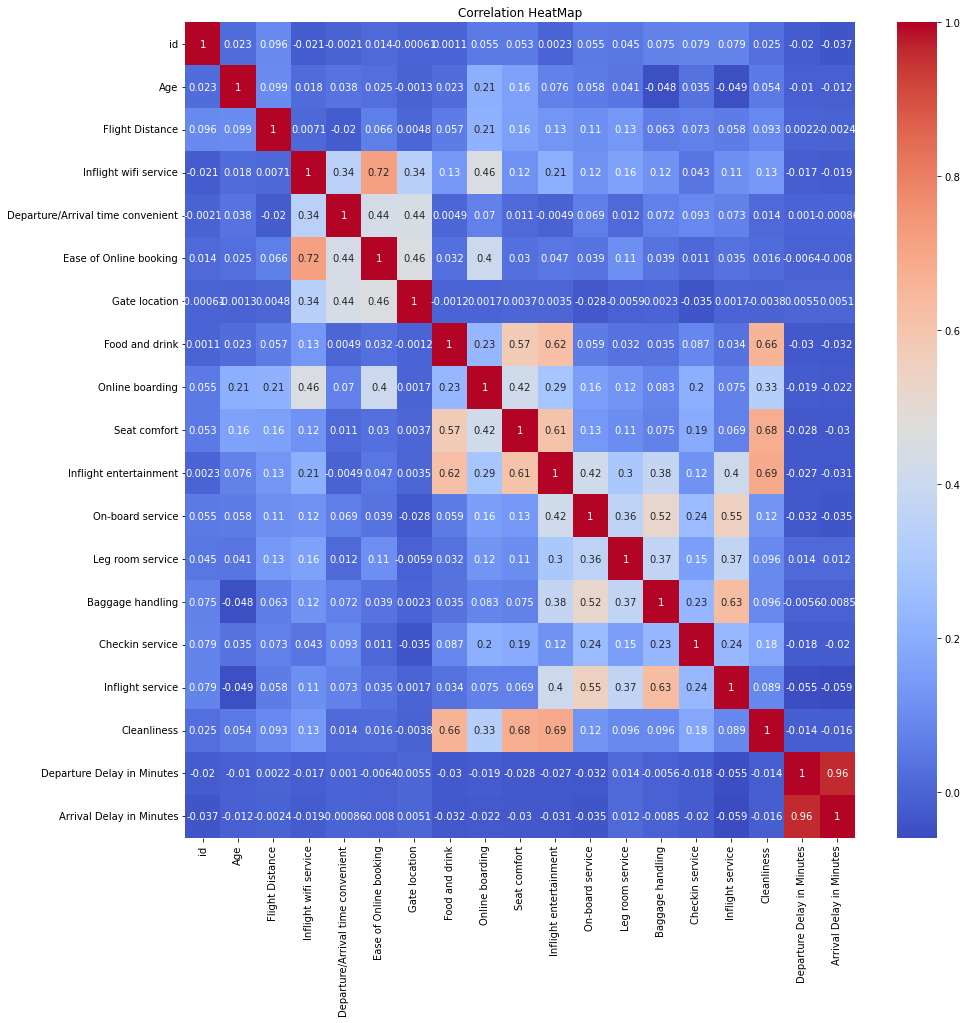

In [150]:
plt.subplots(figsize=(15,15))

plt.title("Correlation HeatMap")
sns.heatmap(df_train.corr(), annot = True, cmap = "coolwarm")
plt.show()

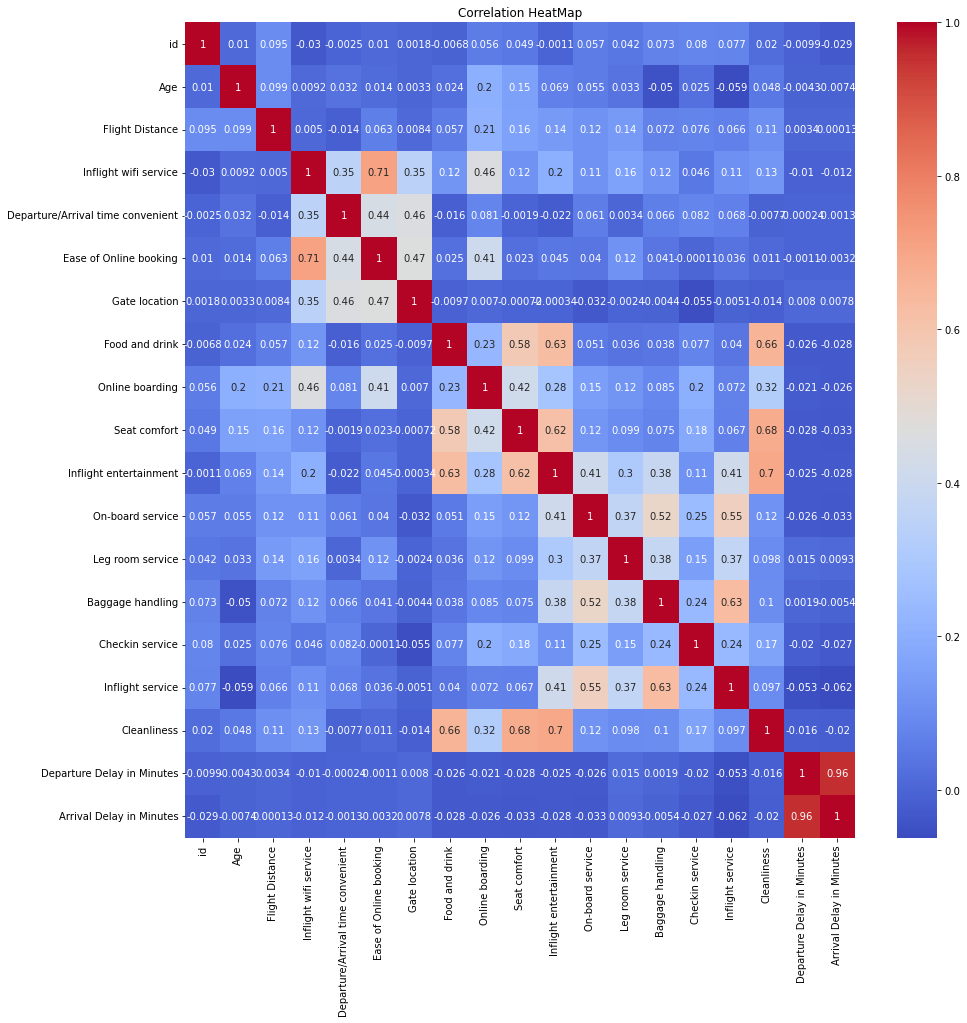

In [151]:
plt.subplots(figsize=(15,15))

plt.title("Correlation HeatMap")
sns.heatmap(df_test.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [152]:
# Count number of functional and non- functional cases
satisfaction =df_train['satisfaction'].value_counts()
print(satisfaction)

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [153]:
satisfaction = df_train["satisfaction"].value_counts(normalize = True)*100
print(satisfaction)

neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64


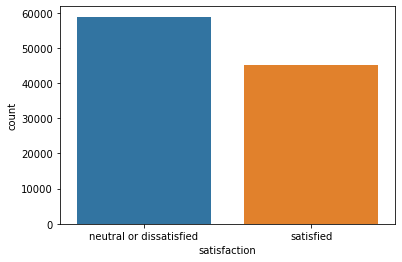

In [154]:
sns.countplot(x = "satisfaction", data = df_train)
plt.show()

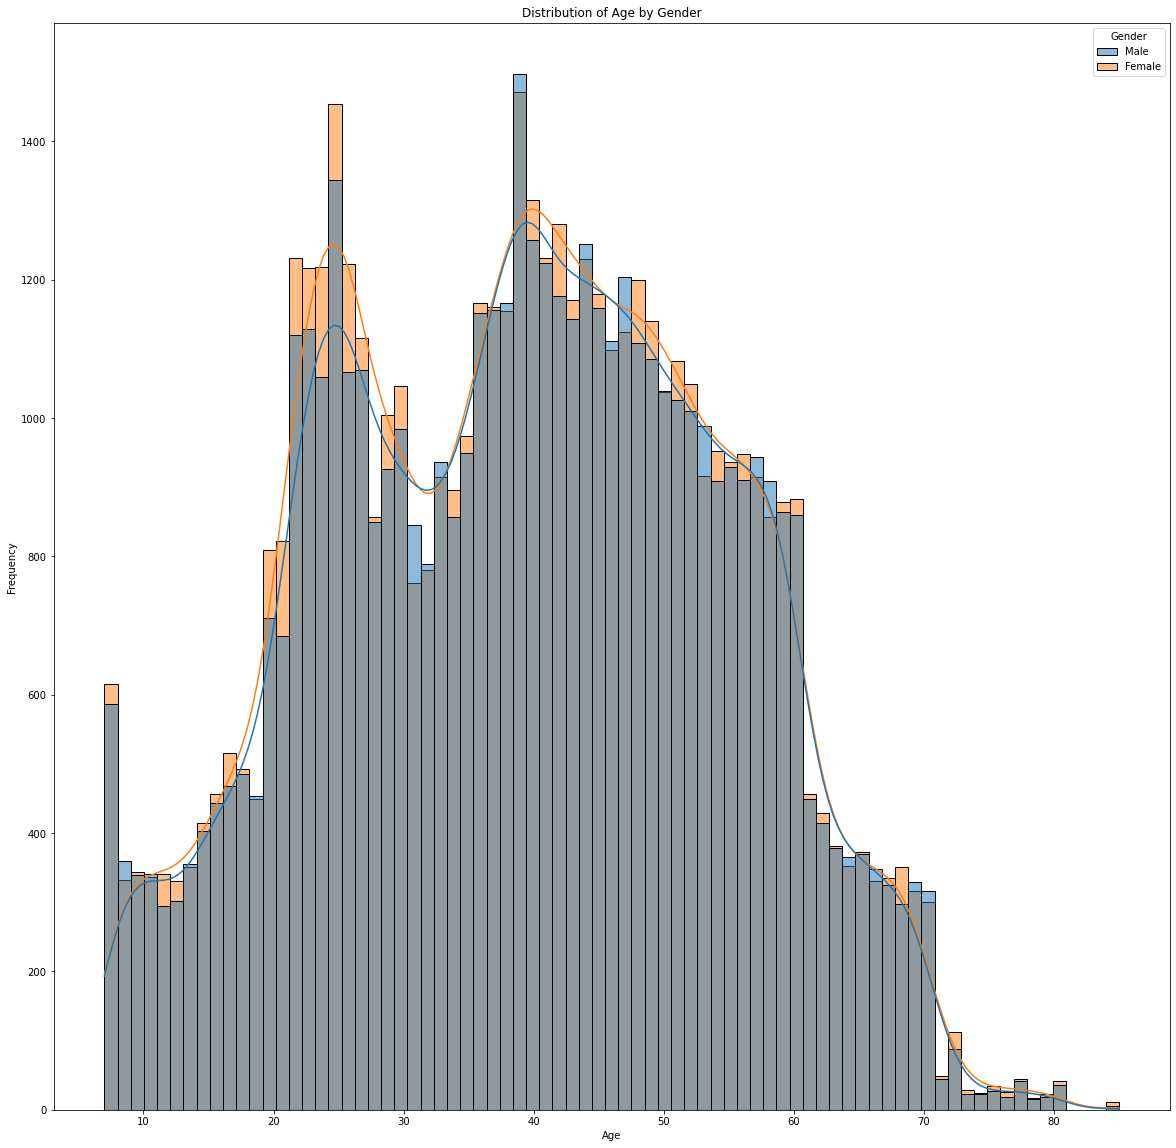

In [155]:
fig, ax = plt.subplots(figsize = (20,20))
sns.histplot(x="Age", hue="Gender", data=df_train, kde=True)
plt.title("Distribution of Age by Gender")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

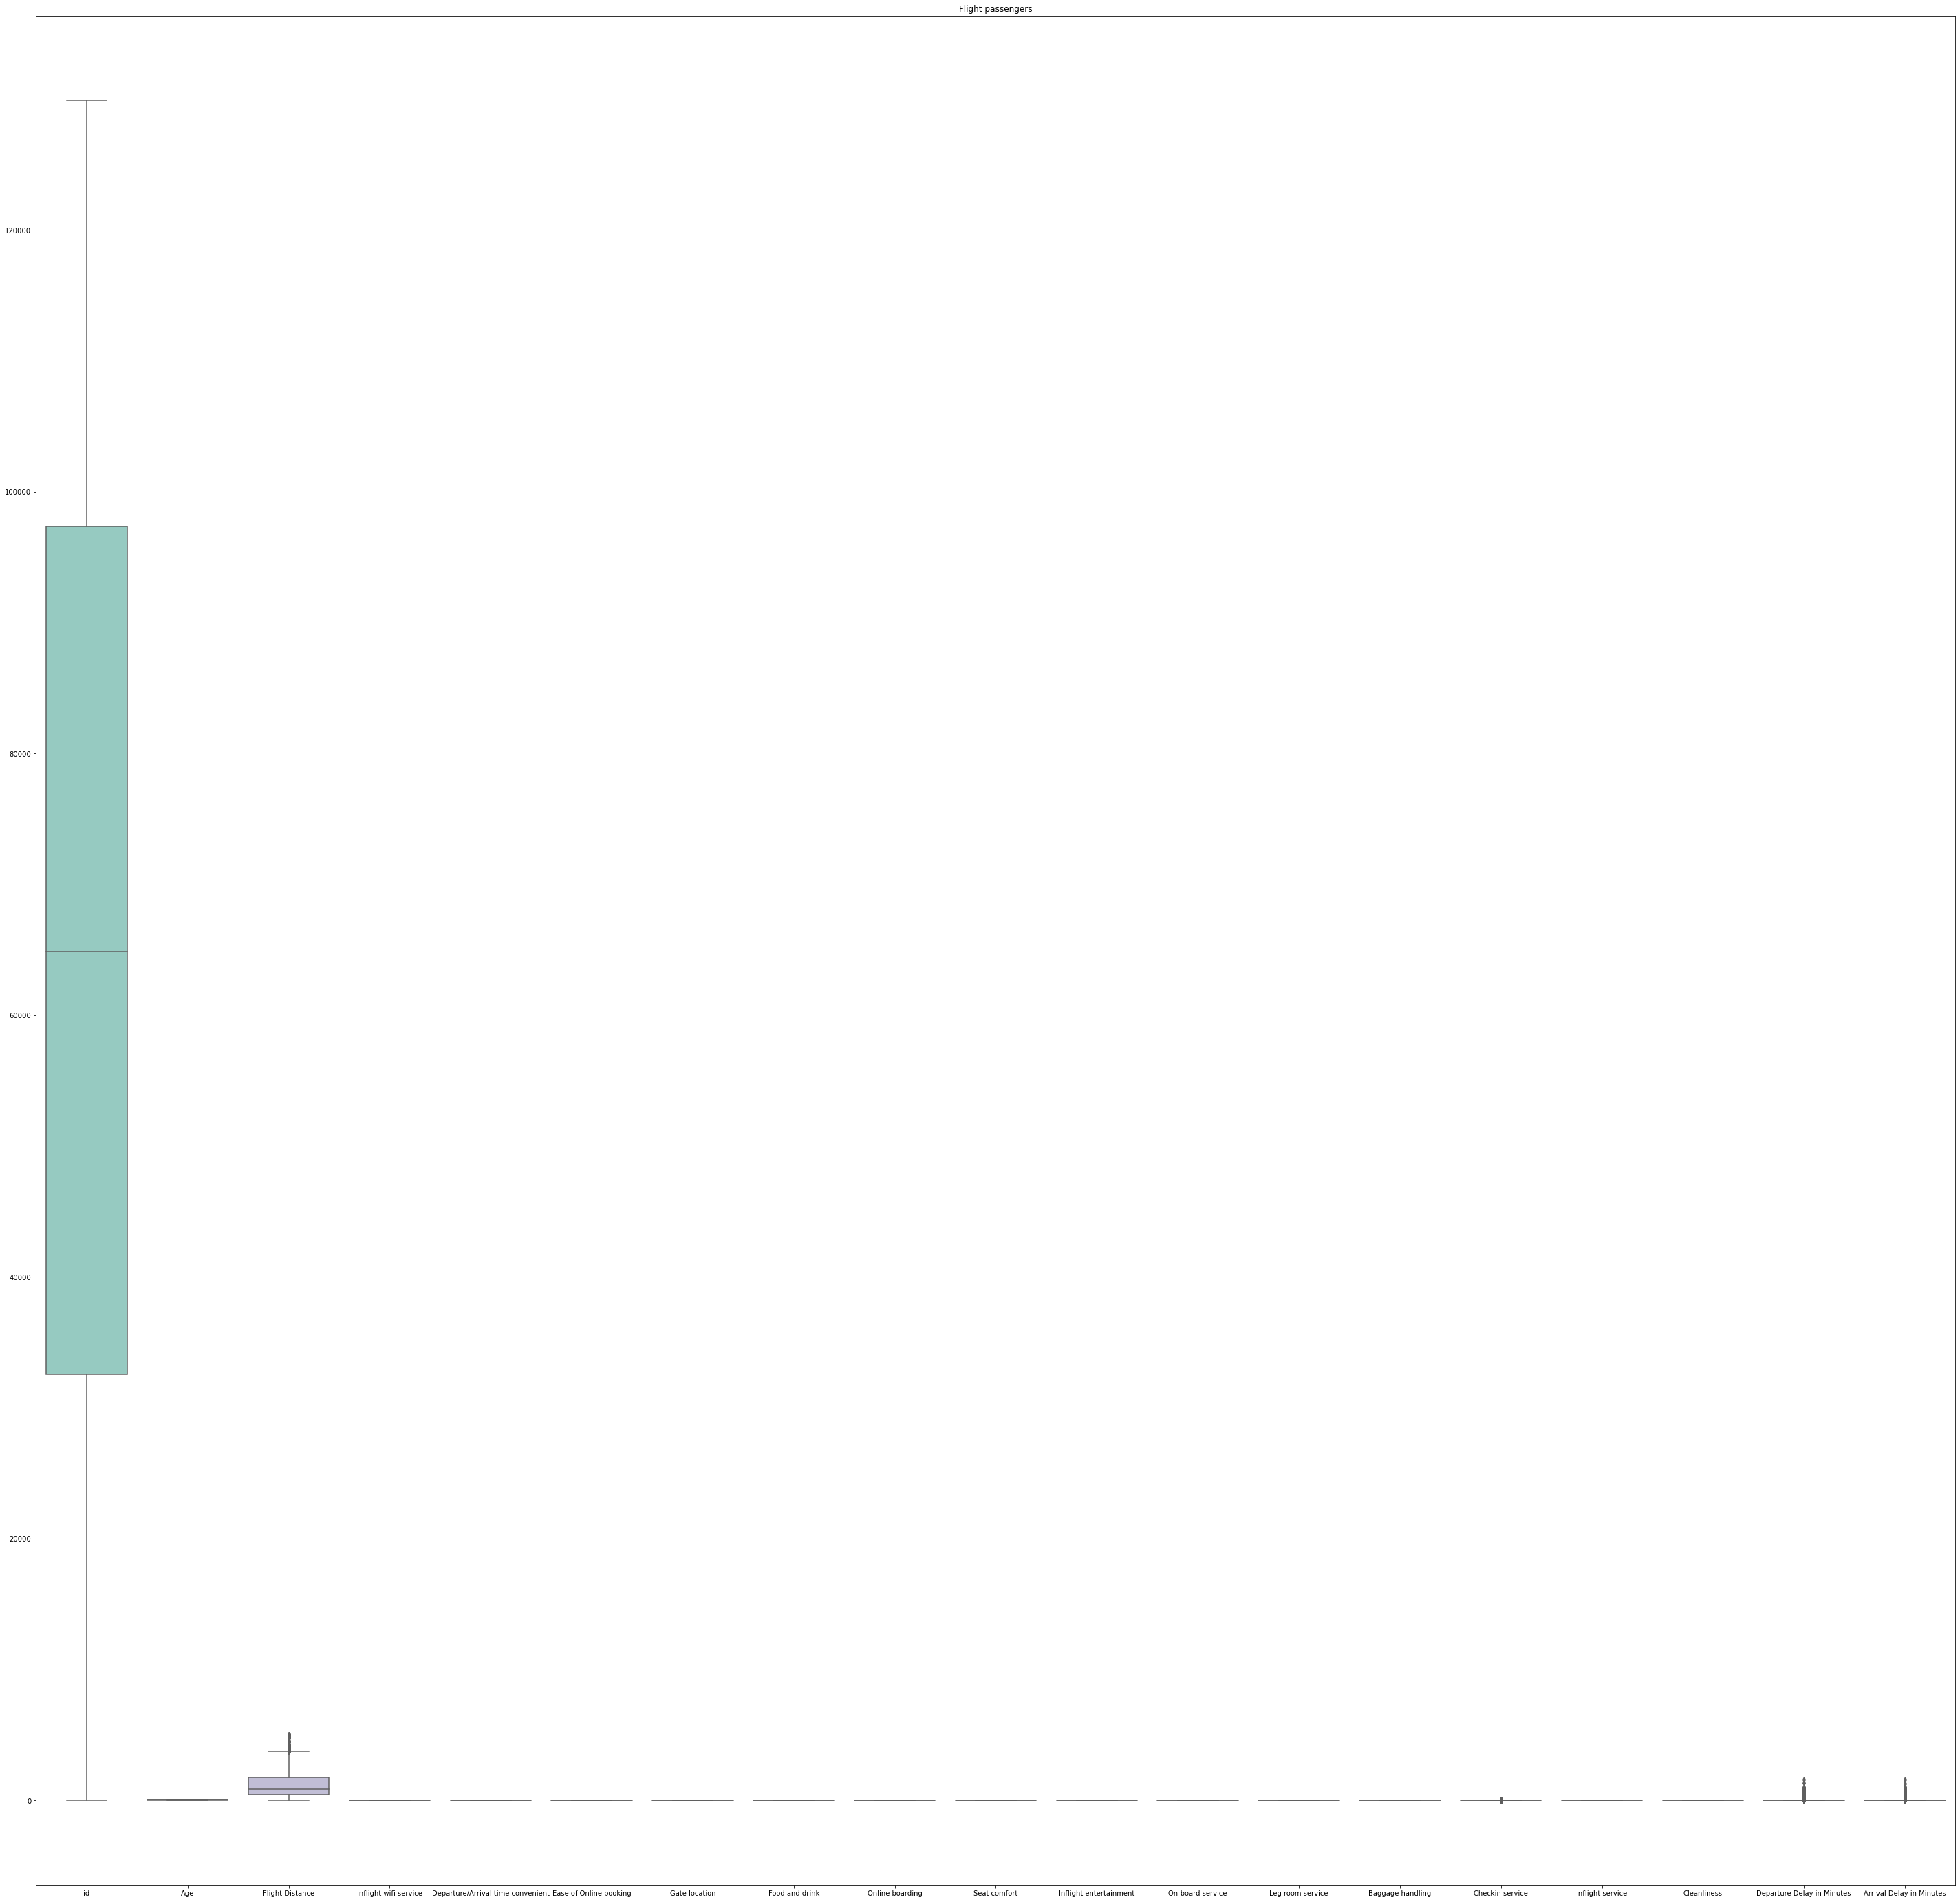

In [156]:
# Create the box plot
fig, ax = plt.subplots(figsize=(50,50))
sns.boxplot(data=df_train, palette="Set3")
plt.title("Flight passengers")
plt.show()

In [157]:
df_train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [158]:
df_test.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [159]:
categorical_columns=['Gender','Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [160]:
for i in categorical_columns:
  df_train[i]=df_train[i].astype('category').cat.codes

In [161]:
for i in categorical_columns:
  df_test[i]=df_test[i].astype('category').cat.codes

In [162]:
df_train.dtypes

id                                     int64
Gender                                  int8
Customer Type                           int8
Age                                    int64
Type of Travel                          int8
Class                                   int8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [163]:
df_test.dtypes

id                                     int64
Gender                                  int8
Customer Type                           int8
Age                                    int64
Type of Travel                          int8
Class                                   int8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [164]:
column_stats = df_train['Flight Distance'].describe()
print(column_stats)

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64


In [165]:
column_stats = df_train['Departure Delay in Minutes'].describe()
print(column_stats)

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64


In [166]:
column_stats = df_train['Arrival Delay in Minutes'].describe()
print(column_stats)

count    103904.000000
mean         15.178678
std          38.640909
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64


In [167]:
df_train['Flight Distance'] = np.where(df_train['Flight Distance'] >2500 , np.sqrt(df_train['Flight Distance']), df_train['Flight Distance'])

In [168]:
df_train['Departure Delay in Minutes'] = np.where(df_train['Departure Delay in Minutes'] >50 , np.sqrt(df_train['Departure Delay in Minutes']), df_train['Departure Delay in Minutes'])

In [169]:
df_train['Arrival Delay in Minutes'] = np.where(df_train['Arrival Delay in Minutes'] >50 , np.sqrt(df_train['Arrival Delay in Minutes']), df_train['Arrival Delay in Minutes'])

In [171]:
column_stats = df_train['Arrival Delay in Minutes'].describe()
print(column_stats)

count    103904.000000
mean          6.385068
std          10.584956
min           0.000000
25%           0.000000
50%           0.000000
75%           9.110434
max          50.000000
Name: Arrival Delay in Minutes, dtype: float64


In [172]:
column_stats = df_test['Flight Distance'].describe()
print(column_stats)

count    25976.000000
mean      1193.788459
std        998.683999
min         31.000000
25%        414.000000
50%        849.000000
75%       1744.000000
max       4983.000000
Name: Flight Distance, dtype: float64


In [173]:
column_stats = df_test['Departure Delay in Minutes'].describe()
print(column_stats)

count    25976.00000
mean        14.30609
std         37.42316
min          0.00000
25%          0.00000
50%          0.00000
75%         12.00000
max       1128.00000
Name: Departure Delay in Minutes, dtype: float64


In [174]:
column_stats = df_test['Arrival Delay in Minutes'].describe()
print(column_stats)

count    25976.000000
mean        14.740857
std         37.457549
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64


In [175]:
df_test['Flight Distance'] = np.where(df_test['Flight Distance'] >2500 , np.sqrt(df_test['Flight Distance']), df_test['Flight Distance'])

In [176]:
df_test['Departure Delay in Minutes'] = np.where(df_test['Departure Delay in Minutes'] >50 , np.sqrt(df_test['Departure Delay in Minutes']), df_test['Departure Delay in Minutes'])

In [177]:
df_test['Arrival Delay in Minutes'] = np.where(df_test['Arrival Delay in Minutes'] >50 , np.sqrt(df_test['Arrival Delay in Minutes']), df_test['Arrival Delay in Minutes'])

In [179]:
train_df=df_train.drop(['id'],axis=1)

In [180]:
test_df=df_test.drop(['id'],axis=1)

In [181]:
# Split the dataset into training and testing sets
# Use 70% of the data for training and 30% for testing
train_data = train_df.sample(frac=0.7, random_state=42)
test_data = train_df.drop(train_data.index)

In [184]:

# Separate the features and target variables
X_train = train_data.drop('satisfaction', axis=1)
y_train = train_data['satisfaction']
X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']

In [185]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72733, 22)
(72733,)
(31171, 22)
(31171,)


In [186]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [187]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [188]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, variance, and prior probability for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [189]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [190]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification accuracy", accuracy(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification accuracy", accuracy(y_test, predictions))

Naive Bayes train classification accuracy 0.8680791387678221
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification accuracy 0.8704885951685862


In [191]:
def precision(y_train,ypred):
    true_positives = 0
    false_positives = 0
    for i in range(len(y_train)):
        if ypred[i] == 1:
            if y_train[i] == ypred[i]:
                true_positives += 1
            else:
                false_positives += 1
    if true_positives + false_positives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_positives) 

In [192]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification precision", precision(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification precision", precision(y_test, predictions))

Naive Bayes train classification precision 0.8684421573213927
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification precision 0.8716479668974297


In [193]:
def recall(y_train,ypred):
    true_positives = 0
    false_negatives = 0
    for i in range(len(y_train)):
        if y_train[i] == 1:
            if y_train[i] == ypred[i]:
                true_positives += 1
            else:
                false_negatives += 1
    if true_positives + false_negatives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_negatives) 

In [194]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification recall", recall(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification recall", recall(y_test, predictions))

Naive Bayes train classification recall 0.8212152810692956
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification recall 0.8188069965615189


## Hyper Parameter Tuning